สมาชิกภายในกลุ่ม
*   นายวิทยา พิมพ์ตา 6310401157
*   นายศุภกิจ ชาวประเสริฐ 6310404059
*   นายกฤษดา เครือเสนา 6310406256

# Mini Project - Time Series Forecasting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import RegressorChain
from sklearn.tree import DecisionTreeRegressor

In [ ]:
col_names = ["date", "small", "large", "type", "year", "region"]
df = pd.read_csv("/content/Apple.csv", names=col_names, header=0)

df.head()

,date,small,large,type,year,region
0,27/12/2015,1036.74,54454.85,conventional,2015,Albany
1,20/12/2015,674.28,44638.81,conventional,2015,Albany
2,13/12/2015,794.70,109149.67,conventional,2015,Albany
3,6/12/2015,1132.00,71976.41,conventional,2015,Albany
4,29/11/2015,941.48,43838.39,conventional,2015,Albany


## Convert "date" to Datetime

In [ ]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

## Plotting Functions

In [ ]:
def plot_mape(x: list[str], y: list[float]) -> None:
    plt.bar(x, y, width=0.75)
    plt.xlabel("regressor models")
    plt.ylabel("MAPE (%)")

    for index, value in enumerate(y):
        plt.text(index, value + 0.05, f"{value:.2f}", ha="center")

    plt.show()

def plot_something(input, actual, baseline, decision_tree, gradient_boosting):
    _, ax = plt.subplots(figsize=(15, 5))

    n = input.shape[0]

    ax.plot(np.arange(n), input, label="input", color="blue")
    ax.plot(np.arange(n, n * 2), actual, label="actual", color="blue", marker=".")
    ax.plot(np.arange(n, n * 2), baseline, label="baseline", color="red", marker="o")
    ax.plot(np.arange(n, n * 2), decision_tree, label="decision_tree", color="green", marker="^")
    ax.plot(np.arange(n, n * 2), gradient_boosting, label="gradient_boosting", color="black", marker="P")

    plt.legend(loc="best")
    plt.show()

## Time Series Forecasting 1 - Next Step from Previous Step

### Prepare Data Organic Lasvegas

In [ ]:
LasVegas_df = df.query("type == 'organic' and region == 'LasVegas'")
LasVegas_df = LasVegas_df.set_index("date").sort_index()
COLUMN = "small"
# reverse shift to get baseline prediction
LasVegas_df["target"] = LasVegas_df[COLUMN].shift(-1)
# drop the last record that is N/A from shifting
LasVegas_df = LasVegas_df.dropna(axis=0)

LasVegas_df

,small,large,type,year,region,target
date,,,,,,
2015-01-04,3730.80,2141.91,organic,2015,LasVegas,4027.30
2015-01-11,4027.30,2083.92,organic,2015,LasVegas,3449.94
2015-01-18,3449.94,1769.04,organic,2015,LasVegas,2421.36
2015-01-25,2421.36,3050.67,organic,2015,LasVegas,4366.54
2015-02-01,4366.54,2884.30,organic,2015,LasVegas,3705.92
...,...,...,...,...,...,...
2018-02-18,1473.68,1915.56,organic,2018,LasVegas,1407.85
2018-02-25,1407.85,1898.15,organic,2018,LasVegas,1575.20
2018-03-04,1575.20,2190.42,organic,2018,LasVegas,1966.47


### Select Features and Target

In [ ]:
LasVegas_df

,small,large,type,year,region,target
date,,,,,,
2015-01-04,3730.80,2141.91,organic,2015,LasVegas,4027.30
2015-01-11,4027.30,2083.92,organic,2015,LasVegas,3449.94
2015-01-18,3449.94,1769.04,organic,2015,LasVegas,2421.36
2015-01-25,2421.36,3050.67,organic,2015,LasVegas,4366.54
2015-02-01,4366.54,2884.30,organic,2015,LasVegas,3705.92
...,...,...,...,...,...,...
2018-02-18,1473.68,1915.56,organic,2018,LasVegas,1407.85
2018-02-25,1407.85,1898.15,organic,2018,LasVegas,1575.20
2018-03-04,1575.20,2190.42,organic,2018,LasVegas,1966.47


In [ ]:
FEATURES = [COLUMN]
TARGET = "target"

x = LasVegas_df[FEATURES]
y = LasVegas_df[TARGET]


### Split into Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)

y_train.shape, y_test.shape

((117,), (51,))

### Baseline Prediction

In [ ]:
tsf1_baseline_y_pred = LasVegas_df["small"]
tsf1_actual_y_pred = LasVegas_df[TARGET]

### Decision Tree Regressor

In [ ]:
tsf1_dtr_reg = DecisionTreeRegressor()
tsf1_dtr_reg.fit(x_train, y_train)

tsf1_dtr_y_pred = tsf1_dtr_reg.predict(x_test)

### Gradient Boosting Regressor

In [ ]:
tsf1_gbr_reg = GradientBoostingRegressor()
tsf1_gbr_reg.fit(x_train, y_train)

tsf1_gbr_y_pred = tsf1_gbr_reg.predict(x_test)

### Evaluate Predictions

In [ ]:
tsf1_df = pd.DataFrame(x_test).rename({COLUMN:"actual"}, axis=1)
tsf1_df["actual"] = tsf1_actual_y_pred
tsf1_df["baseline"] = tsf1_baseline_y_pred
tsf1_df["decision_tree"] = tsf1_dtr_y_pred
tsf1_df["gradient_boosting"] = tsf1_gbr_y_pred

tsf1_df


,actual,baseline,decision_tree,gradient_boosting
date,,,,
2017-04-02,1623.51,1691.21,1776.21,1781.421189
2017-04-09,1471.80,1623.51,2067.07,1839.211484
2017-04-16,1121.34,1471.80,1481.93,1652.989311
2017-04-23,1049.39,1121.34,1129.81,1137.105644
2017-04-30,2767.64,1049.39,707.37,1038.459836
2017-05-07,3039.00,2767.64,2546.13,2404.369220
2017-05-14,2887.66,3039.00,4950.22,4080.151157
2017-05-21,1872.87,2887.66,2503.68,2404.369220
2017-05-28,2283.25,1872.87,1691.21,1976.477896


In [ ]:
def mape(y_true, y_pred):
  return round(np.mean(np.abs((y_true-y_pred)/y_true))*100,2)

In [ ]:
tsf1_baseline_mape = mape(tsf1_df['actual'], tsf1_df['baseline'])
tsf1_decision_tree_mape = mape(tsf1_df['actual'], tsf1_df['decision_tree'])
tsf1_gradient_boosting_mape = mape(tsf1_df['actual'], tsf1_df['gradient_boosting'])

print(f"baseline         : {tsf1_baseline_mape:.4f}")
print(f"decision_tree    : {tsf1_decision_tree_mape:.4f}")
print(f"gradient_boosting: {tsf1_gradient_boosting_mape:.4f}")

baseline         : 20.0300
decision_tree    : 36.0800
gradient_boosting: 27.2400


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

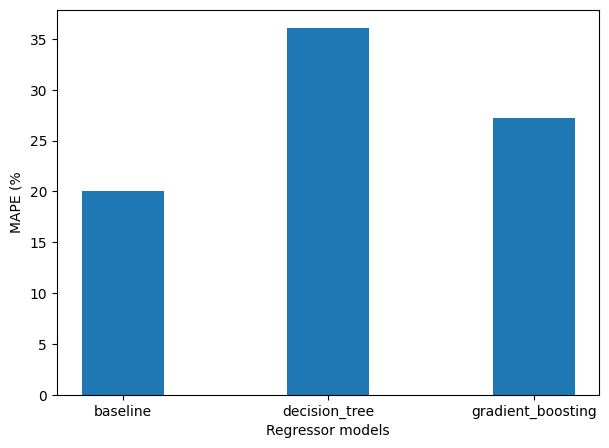

In [ ]:
x = ["baseline", "decision_tree", "gradient_boosting"]
y = [tsf1_baseline_mape, tsf1_decision_tree_mape, tsf1_gradient_boosting_mape]

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%')

plt.tight_layout

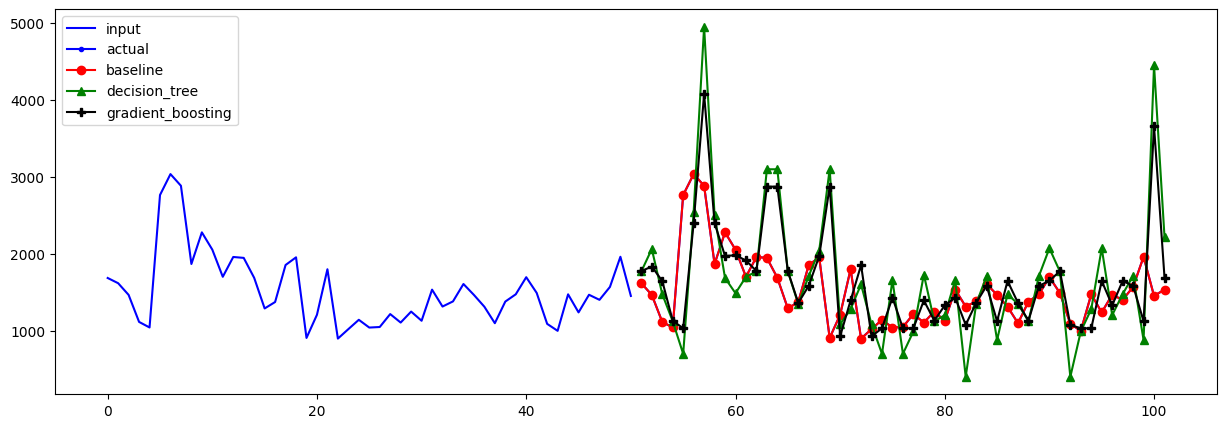

In [ ]:
plot_something(x_test, y_test, y_test, tsf1_dtr_y_pred, tsf1_gbr_y_pred)

## Time Series Forecasting 2 - Next Step from Past Sequence

### Prepare Data

In [ ]:
def window_input(data: pd.DataFrame, column: str, input_size: int) -> pd.DataFrame:
    df = data.copy()
    for i in range(1, input_size + 1):
        df[f"x_{i}"] = df[column].shift(-i)
    return df

In [ ]:
LasVegas_df = df.query("type == 'organic' and region == 'LasVegas'")
LasVegas_df = LasVegas_df.set_index("date").sort_index()
# shift up to window_size times to add past sequence
LasVegas_df = window_input(LasVegas_df, column=COLUMN, input_size=5)
# drop rows equal to window_size to handle N/A from shifting
LasVegas_df = LasVegas_df.dropna(axis=0)

LasVegas_df

,small,large,type,year,region,x_1,x_2,x_3,x_4,x_5
date,,,,,,,,,,
2015-01-04,3730.80,2141.91,organic,2015,LasVegas,4027.30,3449.94,2421.36,4366.54,3705.92
2015-01-11,4027.30,2083.92,organic,2015,LasVegas,3449.94,2421.36,4366.54,3705.92,3336.65
2015-01-18,3449.94,1769.04,organic,2015,LasVegas,2421.36,4366.54,3705.92,3336.65,3979.49
2015-01-25,2421.36,3050.67,organic,2015,LasVegas,4366.54,3705.92,3336.65,3979.49,4161.89
2015-02-01,4366.54,2884.30,organic,2015,LasVegas,3705.92,3336.65,3979.49,4161.89,2676.09
...,...,...,...,...,...,...,...,...,...,...
2018-01-21,1096.07,1280.31,organic,2018,LasVegas,1005.73,1479.32,1244.97,1473.68,1407.85
2018-01-28,1005.73,2110.22,organic,2018,LasVegas,1479.32,1244.97,1473.68,1407.85,1575.20
2018-02-04,1479.32,1512.78,organic,2018,LasVegas,1244.97,1473.68,1407.85,1575.20,1966.47


### Select Features and Target

In [ ]:
FEATURES = [col for col in LasVegas_df.columns if col.startswith("x_")]
TARGET = COLUMN

x = LasVegas_df[FEATURES]
y = LasVegas_df[TARGET]

### Split into Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)

y_train.shape, y_test.shape

((114,), (50,))

### Baseline Prediction

In [ ]:
tsf2_baseline_y_pred = x_test.mean(axis=1)

tsf2_baseline_y_pred.head()

date
2017-03-12    1842.880
2017-03-19    1557.388
2017-03-26    1391.450
2017-04-02    1606.736
2017-04-09    1889.834
dtype: float64

### Decision Tree Regressor

In [ ]:
tsf2_dtr_reg = DecisionTreeRegressor()
tsf2_dtr_reg.fit(x_train, y_train)

tsf2_dtr_y_pred = tsf2_dtr_reg.predict(x_test)

### Gradient Boosting Regressor

In [ ]:
tsf2_gbr_reg = GradientBoostingRegressor()
tsf2_gbr_reg.fit(x_train, y_train)

tsf2_gbr_y_pred = tsf2_gbr_reg.predict(x_test)

### Evaluate Predictions

In [ ]:
tsf2_df = pd.DataFrame(y_test).rename({COLUMN: "actual"}, axis=1)
tsf2_df["baseline"] = tsf2_baseline_y_pred
tsf2_df["decision_tree"] = tsf2_dtr_y_pred
tsf2_df["gradient_boosting"] = tsf2_gbr_y_pred

tsf2_df.head()

,actual,baseline,decision_tree,gradient_boosting
date,,,,
2017-03-12,2478.71,1842.880,2868.88,2612.230672
2017-03-19,2548.80,1557.388,2223.41,1858.153908
2017-03-26,1879.08,1391.450,1815.17,1507.284358
2017-04-02,1691.21,1606.736,1815.17,1464.345241
2017-04-09,1623.51,1889.834,1776.21,1789.356012


In [ ]:
tsf2_baseline_mape = mape(tsf2_df['actual'], tsf2_df['baseline'])
tsf2_decision_tree_mape = mape(tsf2_df['actual'], tsf2_df['decision_tree'])
tsf2_gradient_boosting_mape = mape(tsf2_df['actual'], tsf2_df['gradient_boosting'])

print(f"baseline         : {tsf2_baseline_mape:.4f}")
print(f"decision_tree    : {tsf2_decision_tree_mape:.4f}")
print(f"gradient_boosting: {tsf2_gradient_boosting_mape:.4f}")

baseline         : 21.8800
decision_tree    : 33.3500
gradient_boosting: 20.4600


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

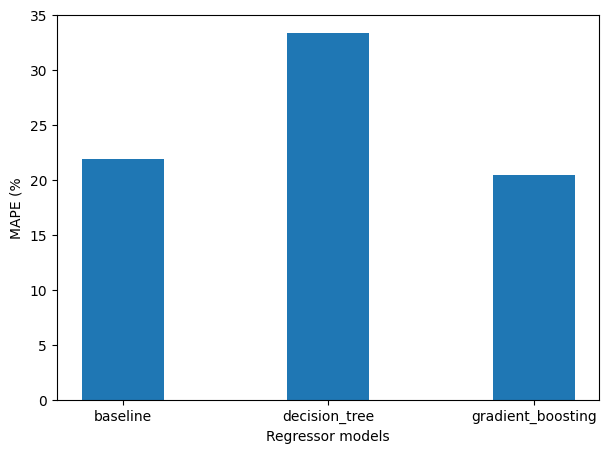

In [ ]:
x = ["baseline", "decision_tree", "gradient_boosting"]
y = [tsf2_baseline_mape, tsf2_decision_tree_mape, tsf2_gradient_boosting_mape]

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%')

plt.tight_layout

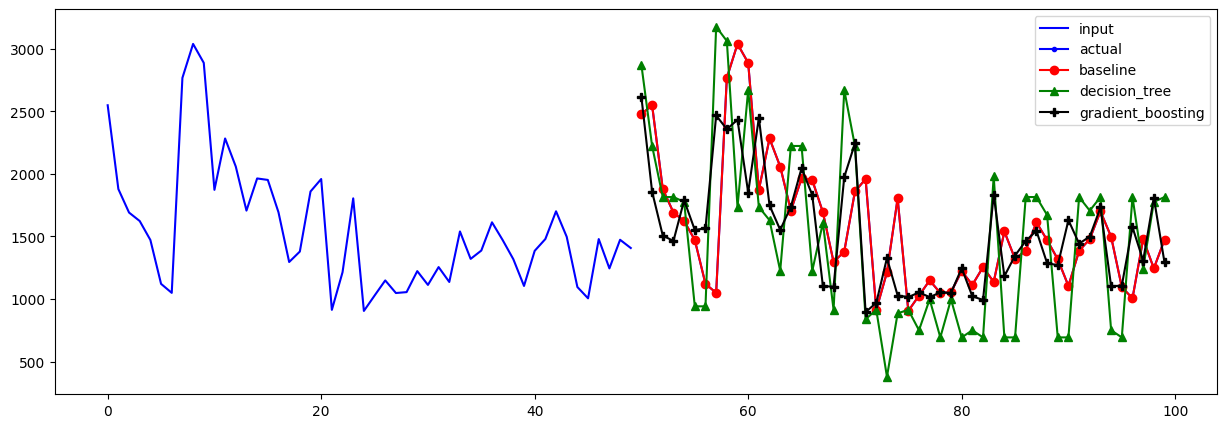

In [ ]:
plot_something(x_test.iloc[:, 0], y_test, y_test, tsf2_dtr_y_pred, tsf2_gbr_y_pred)

## Time Series Forecasting 3 - Future Sequence from Past Sequence

### Prepare Data

In [ ]:
def window_input_output(
    data: pd.DataFrame, column: str, input_size: int, output_size: int
) -> pd.DataFrame:
    df = data.copy()

    for i in range(1, input_size):
        df[f"x_{i}"] = df[column].shift(-i)
    for i in range(output_size):
        df[f"y_{i}"] = df[column].shift(-output_size - i)

    return df

In [ ]:
input_size = 25
output_size = 25

LasVegas_df = df.query("type == 'organic' and region == 'LasVegas'")
LasVegas_df = LasVegas_df.set_index("date").sort_index()
LasVegas_df = window_input_output(
    LasVegas_df, column=COLUMN, input_size=input_size, output_size=output_size
)
LasVegas_df = LasVegas_df.dropna(axis=0)

LasVegas_df

,small,large,type,year,region,x_1,x_2,x_3,x_4,x_5,...,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24
date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,3730.80,2141.91,organic,2015,LasVegas,4027.30,3449.94,2421.36,4366.54,3705.92,...,1288.15,1353.82,1225.40,1735.17,2671.45,1845.67,2047.55,1460.87,2223.41,1979.71
2015-01-11,4027.30,2083.92,organic,2015,LasVegas,3449.94,2421.36,4366.54,3705.92,3336.65,...,1353.82,1225.40,1735.17,2671.45,1845.67,2047.55,1460.87,2223.41,1979.71,1672.16
2015-01-18,3449.94,1769.04,organic,2015,LasVegas,2421.36,4366.54,3705.92,3336.65,3979.49,...,1225.40,1735.17,2671.45,1845.67,2047.55,1460.87,2223.41,1979.71,1672.16,1188.98
2015-01-25,2421.36,3050.67,organic,2015,LasVegas,4366.54,3705.92,3336.65,3979.49,4161.89,...,1735.17,2671.45,1845.67,2047.55,1460.87,2223.41,1979.71,1672.16,1188.98,1709.77
2015-02-01,4366.54,2884.30,organic,2015,LasVegas,3705.92,3336.65,3979.49,4161.89,2676.09,...,2671.45,1845.67,2047.55,1460.87,2223.41,1979.71,1672.16,1188.98,1709.77,1630.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-19,2548.80,4383.36,organic,2017,LasVegas,1879.08,1691.21,1623.51,1471.80,1121.34,...,1385.31,1479.66,1701.33,1497.55,1096.07,1005.73,1479.32,1244.97,1473.68,1407.85
2017-03-26,1879.08,4266.97,organic,2017,LasVegas,1691.21,1623.51,1471.80,1121.34,1049.39,...,1479.66,1701.33,1497.55,1096.07,1005.73,1479.32,1244.97,1473.68,1407.85,1575.20
2017-04-02,1691.21,3619.37,organic,2017,LasVegas,1623.51,1471.80,1121.34,1049.39,2767.64,...,1701.33,1497.55,1096.07,1005.73,1479.32,1244.97,1473.68,1407.85,1575.20,1966.47


### Select Features and Target

In [ ]:
FEATURES = [COLUMN] + [col for col in LasVegas_df.columns if col.startswith("x_")]
TARGET = [col for col in LasVegas_df.columns if col.startswith("y_")]

x = LasVegas_df[FEATURES]
y = LasVegas_df[TARGET]

In [ ]:
LasVegas_df.columns.str.startswith("x_")

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### Split into Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)

y_train.shape, y_test.shape

((84, 25), (36, 25))

### Baseline Prediction

In [ ]:
tsf3_baseline_y_pred = np.array(x_test)

### Decision Tree Regressor

In [ ]:
tsf3_dtr_reg = DecisionTreeRegressor()
tsf3_dtr_reg.fit(x_train, y_train)

tsf3_dtr_y_pred = tsf3_dtr_reg.predict(x_test)

### Gradient Boosting Regressor

In [ ]:
reg = GradientBoostingRegressor()

tsf3_gbr_reg = RegressorChain(reg)
tsf3_gbr_reg.fit(x_train, y_train)

tsf3_gbr_y_pred = tsf3_gbr_reg.predict(x_test)

### Evaluate Predictions

In [ ]:
tsf3_df = pd.DataFrame(np.array(y_test).reshape(1, -1).flatten(), columns=["actual"])

tsf3_df["baseline"] = tsf3_baseline_y_pred.reshape(1, -1).flatten()
tsf3_df["decision_tree"] = tsf3_dtr_y_pred.reshape(1, -1).flatten()
tsf3_df["gradient_boosting"] = tsf3_gbr_y_pred.reshape(1, -1).flatten()

tsf3_df.head()

,actual,baseline,decision_tree,gradient_boosting
0,1662.70,2592.15,1287.54,1342.238762
1,2228.74,2876.49,941.79,1177.753125
2,1900.85,2503.68,1117.76,1573.318072
3,2174.39,2868.88,1129.81,1545.862951
4,2110.61,2324.12,1662.70,1399.775734


In [ ]:
tsf3_baseline_mape = mape(tsf3_df["actual"], tsf3_df["baseline"])
tsf3_decision_tree_mape = mape(tsf3_df["actual"], tsf3_df["decision_tree"])
tsf3_gradient_boosting_mape = mape(tsf3_df["actual"], tsf3_df["gradient_boosting"])

print(f"baseline         : {tsf3_baseline_mape:.4f}")
print(f"decision_tree    : {tsf3_decision_tree_mape:.4f}")
print(f"gradient_boosting: {tsf3_gradient_boosting_mape:.4f}")

baseline         : 55.2900
decision_tree    : 149.1700
gradient_boosting: 171.7600


In [ ]:
tsf3_df["decision_tree"]

0      1287.54
1       941.79
2      1117.76
3      1129.81
4      1662.70
        ...   
895    4462.78
896    3690.40
897    3346.00
898    2964.22
899    3176.01
Name: decision_tree, Length: 900, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

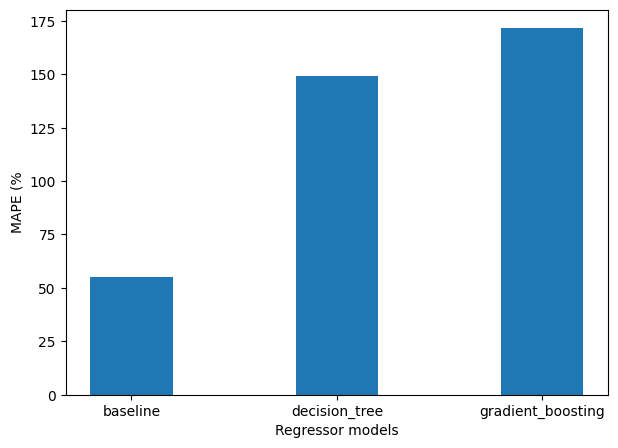

In [ ]:
x = ["baseline", "decision_tree", "gradient_boosting"]
y = [tsf3_baseline_mape, tsf3_decision_tree_mape, tsf3_gradient_boosting_mape]

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%')

plt.tight_layout

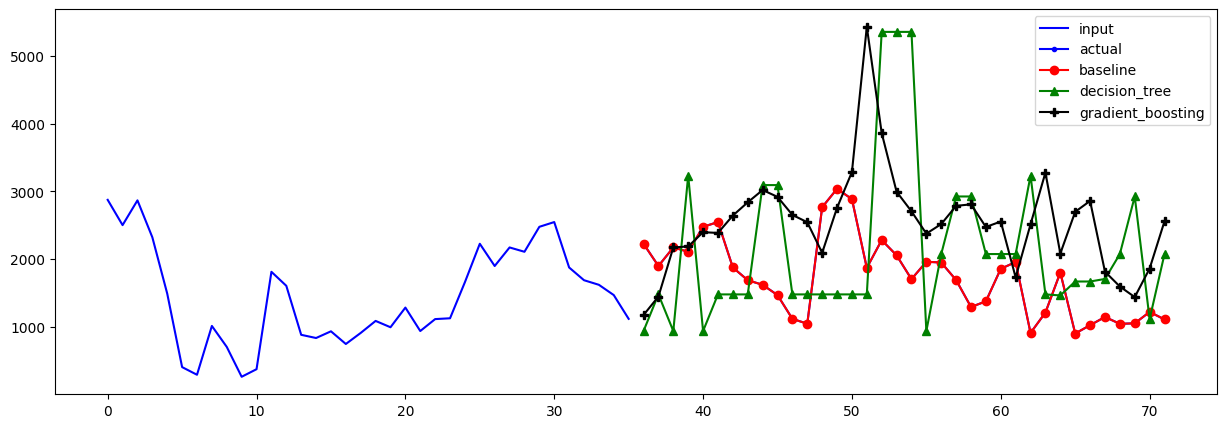

In [ ]:
plot_something(x_test.iloc[:, 1], y_test.iloc[:, 1], y_test.iloc[:, 1], tsf3_dtr_y_pred.T[1], tsf3_gbr_y_pred.T[1])